# 2023 LangChain Korea Meetup
## 나의 시간을 절약해주는 말하는 앵무새 🦜⛓️ - 데이터 분석하기
**발표자 전미정 Microsoft AI MVP**

<img src="https://dl.dropbox.com/scl/fi/afgejnh4atylcu4of7o4p/langchain-agent.png?rlkey=5tqaqnmjeordbms86946sl95l" alt="drawing" width="400"/>

In [ ]:
!pip install openai
!pip install langchain
!pip install langchain_experimental

In [ ]:
import os
from config import OPENAI_API_KEY

# 환경 변수 설정
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
# 파일 불러오기
import pandas as pd
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.agents import AgentType

from langchain.llms import OpenAI

completion_llm = OpenAI(model="gpt-3.5-turbo-instruct",
                        temperature=0)

agent = create_pandas_dataframe_agent(completion_llm,
                                      df=df,
                                      agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                                      verbose=True)

In [ ]:
query = "데이터 정보를 정리해서 알려줘"
agent.run(query)



> Entering new AgentExecutor chain...
Thought: I need to use the info() function to get a summary of the dataframe
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Thought: I need to use the describe() function to get a statistic

'The dataframe has 891 entries and there are some missing values in the Age, Cabin, and Embarked columns. The mean age of passengers is 29.7 and the average fare is 32.2.'

In [ ]:
query = "전체 승객 중 3등급에 탑승한 남성의 생존율을 구해줘"
agent.run(query)



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include passengers with Pclass = 3 and Gender = male, and then calculate the survival rate.
Action: python_repl_ast
Action Input: df[(df['Pclass'] == 3) & (df['Gender'] == 'male')]
Observation:      PassengerId  Survived  Pclass                            Name Gender  \
0              1         0       3         Braund, Mr. Owen Harris   male   
4              5         0       3        Allen, Mr. William Henry   male   
5              6         0       3                Moran, Mr. James   male   
7              8         0       3  Palsson, Master. Gosta Leonard   male   
12            13         0       3  Saundercock, Mr. William Henry   male   
..           ...       ...     ...                             ...    ...   
877          878         0       3            Petroff, Mr. Nedelio   male   
878          879         0       3              Laleff, Mr. Kristo   male   
881          882         

'0.13544668587896252'



> Entering new AgentExecutor chain...
Thought: 데이터프레임에서 연령대별로 데이터를 분류해야 함
Action: python_repl_ast
Action Input: df.groupby(pd.cut(df['Age'], np.arange(0, 90, 10))).Survived.mean().plot(kind='bar')
Observation: NameError: name 'pd' is not defined
Thought: pandas 모듈을 불러와야 함
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought: 다시 실행해서 그래프를 그려보자
Action: python_repl_ast
Action Input: df.groupby(pd.cut(df['Age'], np.arange(0, 90, 10))).Survived.mean().plot(kind='bar')
Observation: NameError: name 'np' is not defined
Thought: numpy 모듈을 불러와야 함
Action: python_repl_ast
Action Input: import numpy as np
Observation: 
Thought: 다시 실행해서 그래프를 그려보자
Action: python_repl_ast
Action Input: df.groupby(pd.cut(df['Age'], np.arange(0, 90, 10))).Survived.mean().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: 연령대별 생존율을 세로 막대 그래프로 그렸다.
Final Answer: 연령대별 생존율을 세로 막대 그래프로 그렸다.

> Finished chain.


'연령대별 생존율을 세로 막대 그래프로 그렸다.'

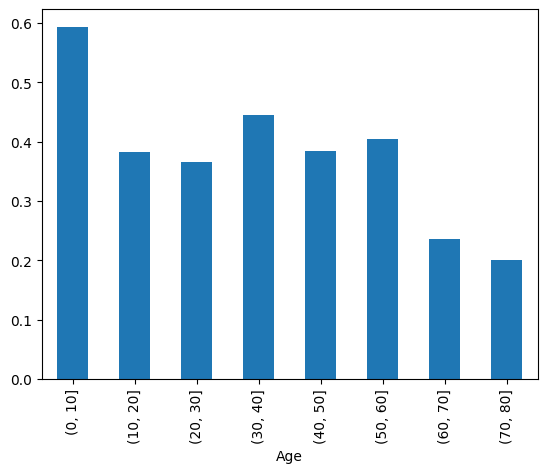

In [ ]:
query = "연령대별 생존율을 세로 막대 그래프로 그려줘"
agent.run(query)



> Entering new AgentExecutor chain...
Thought: I need to use a graph to visualize the data and check for outliers.
Action: python_repl_ast
Action Input: df.plot(kind='box')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The graph shows the distribution of the data and any outliers.
Action: python_repl_ast
Action Input: df.plot(kind='box', y='Age')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The graph shows that there are some outliers in the Age column.
Action: python_repl_ast
Action Input: df.plot(kind='box', y='Fare')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The graph shows that there are some outliers in the Fare column as well.
Action: python_repl_ast
Action Input: df.plot(kind='box', y='Pclass')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The graph shows that there are no outliers in the Pclass column.
Action: python_repl_ast
Action Input: df.plot(kind='box', y='SibSp')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The graph shows that there are some 

'Yes, there are outliers in the Age, Fare, SibSp, and Parch columns.'

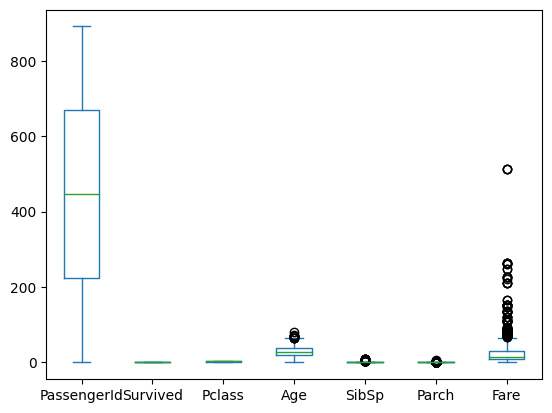

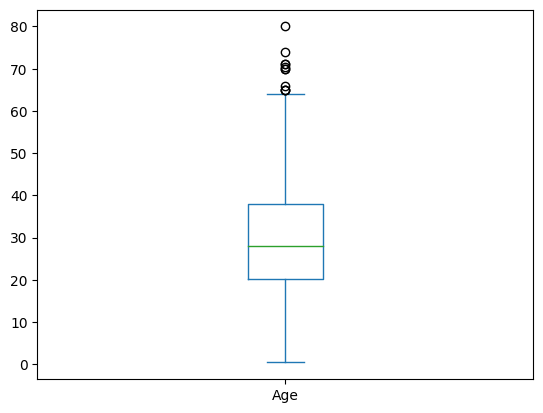

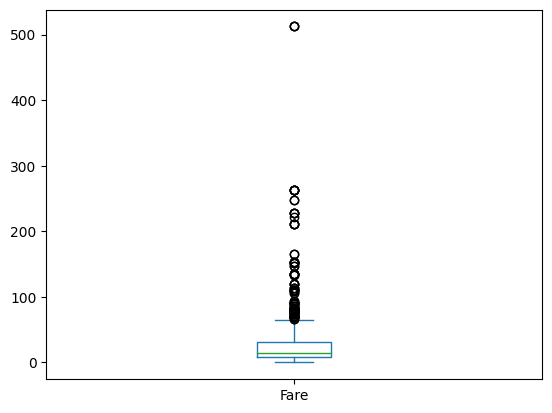

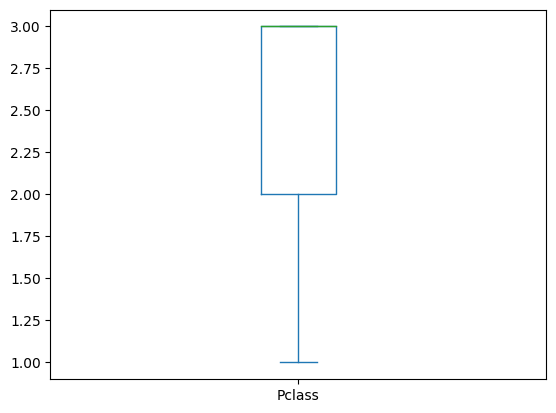

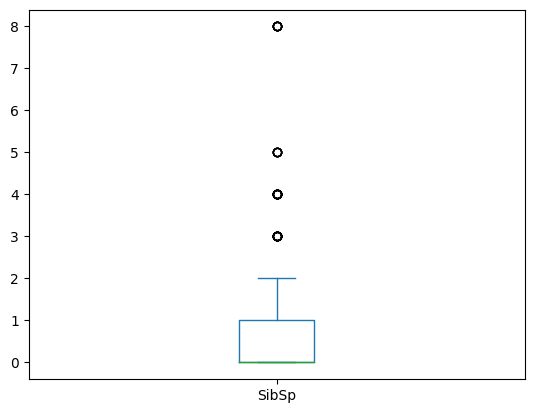

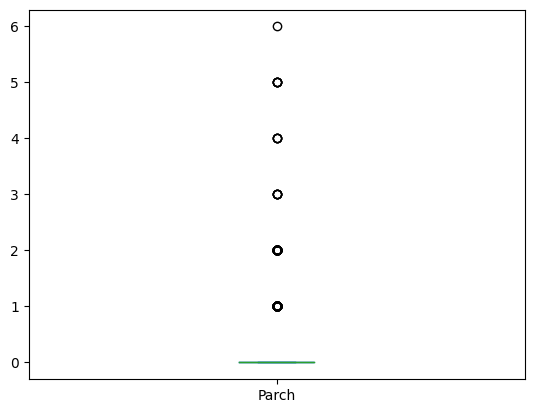

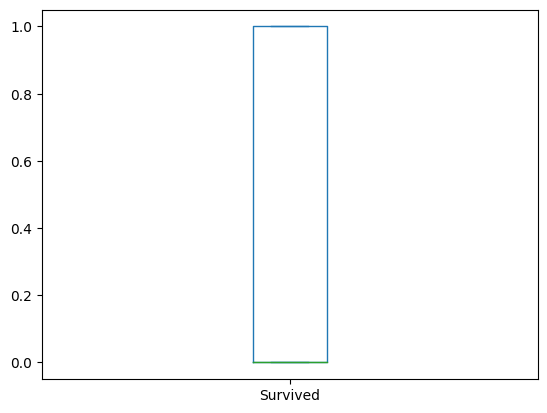

In [ ]:
agent.run("데이터에 이상치가 존재하는지 그래프를 그려서 확인해줘")



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe by passenger class and gender, and then plot a bar graph.
Action: python_repl_ast
Action Input: df.groupby(['Pclass', 'Gender'])['Survived'].mean().unstack().plot.bar(color=['orange', 'green'])
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: The final answer is a bar graph showing the survival rate of passengers in each class and gender, with females represented in orange and males in green.

> Finished chain.


'The final answer is a bar graph showing the survival rate of passengers in each class and gender, with females represented in orange and males in green.'

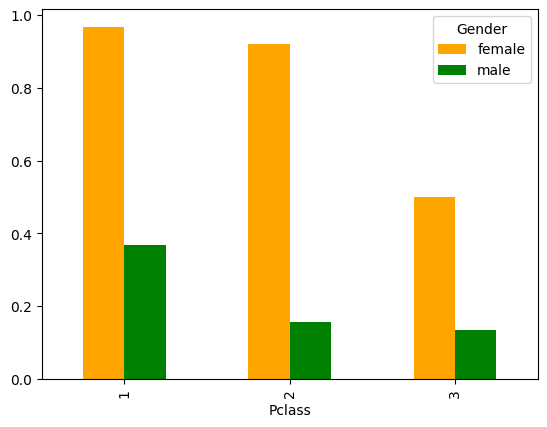

In [ ]:
agent.run("""
1등급, 2등급, 3등급 선실등급에 탑승한 승객의 생존율을 세로 막대 그래프로 그려줘.
각 등급별 남여 성별로 데이터를 구분해서 여성은 주황색/남성은 초록색으로 표시해줘
""")

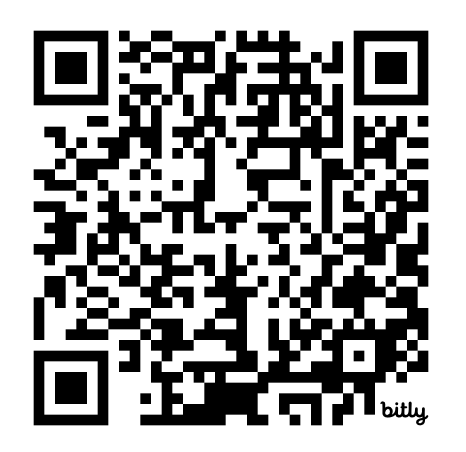